In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from mlxtend.evaluate import bias_variance_decomp


In [2]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [3]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [57]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]



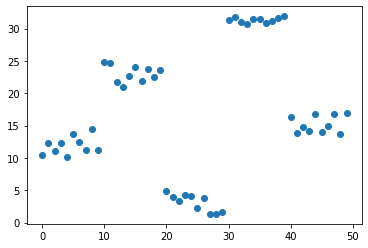

In [58]:
plt.scatter(x,y)

In [59]:
# mse loss function
def compute_loss(y, y_hat):
    return sum((y - y_hat) ** 2 / (2 * y.shape[0]))

In [ ]:
pred_error_lin = []

In [78]:
pred_error_svm = []

Text(0, 0.5, 'Residuals')

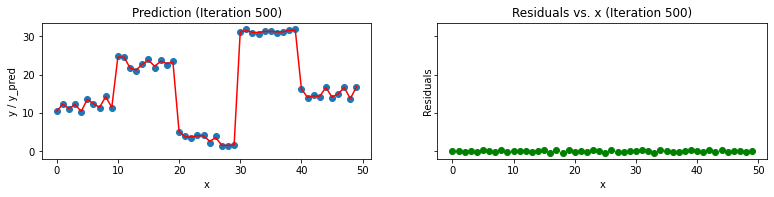

In [99]:
xi = x # initialization of input
yi = y # initialization of target
ei = 0 # initialization of error

n_trees = 500
depth = 1

n = len(yi)  # number of train examples

# initialize the prediction with the average of all train labels for the regressor
predf = np.mean(y, axis = 0) 

x_train = np.array(xi['x'].to_list()).reshape(-1,1)

xa = np.array(x.x)
order = np.argsort(xa)
xs = np.array(xa)[order]



models_all = []

for i in range(n_trees): 

    model_rf = DecisionTreeRegressor(max_depth = depth,random_state=0)
    # model_rf = LinearRegression()
    # model_rf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    
    # fit the weak learners in every iteration
    model_rf.fit(x_train,yi) 
    
    # prediction
    predi = model_rf.predict(x_train)
    
    models_all.append(model_rf)
    
    predi = predi.reshape(-1, 1)
    
    # add previous prediction to current prediction
    predf = predf + predi    
    
    # estimate residuals by taking different between prediction and true labels
    ei = y - predf  
    
    pred_error_des.append(compute_loss(y, predf))
    
    # the labels for the next iteration are the residuals itself
    yi = ei 
    
    # plotting after prediction
    
    ys = np.array(predf)[order]
    

    # f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))
#     plt.plot(x, y, 'o')
#     plt.plot(xs, ys, 'r')
#     plt.xlabel('x')
#     plt.ylabel('y / y_pred')
#     plt.title('Prediction Iteration: {}'.format(i+1))
#     plt.savefig('boosting_output/boost_reg_data_{}'.format(i))
#     plt.clf()
    
#     plt.plot(x, ei, 'go')
    
#     plt.xlabel('x')
#     plt.ylabel('residuals')
#     plt.title('Residuals Iteration: {}'.format(i+1))
#     plt.savefig('boosting_residuals/boost_reg_data_{}'.format(i))
#     plt.clf()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))
ax1.plot(x,y, 'o')
ax1.plot(xs, ys, 'r')
ax1.set_title(f'Prediction (Iteration {i+1})')
ax1.set_xlabel('x')
ax1.set_ylabel('y / y_pred')


ax2.plot(x, ei, 'go')
ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
ax2.set_xlabel('x')
ax2.set_ylabel('Residuals')

Text(0, 0.5, 'Loss')

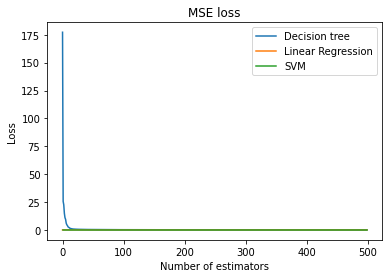

In [87]:
# plot the error over all iterations
plt.plot(pred_error_des)
plt.plot(pred_error_lin)
plt.plot(pred_error_svm)
plt.title('MSE loss')
plt.legend(['Decision tree', 'Linear Regression', 'SVM'])
plt.xlabel('Number of estimators')
plt.ylabel('Loss')

[Text(167.4, 163.07999999999998, 'X[0] <= 21.5\nmse = 0.048\nsamples = 50\nvalue = -0.0'),
 Text(83.7, 54.360000000000014, 'mse = 0.052\nsamples = 22\nvalue = 0.015'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.044\nsamples = 28\nvalue = -0.012')]

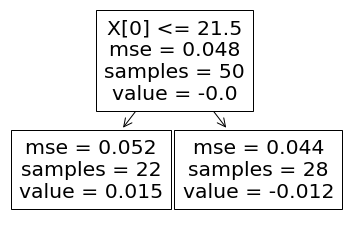

In [100]:
from sklearn import tree

tree.plot_tree(models_all[499])